# Review of exercises

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fileName = "../data/shortRaw.npy" # binder users or people with a local git repository
dat = np.load(fileName)

In [5]:
print("ndim:",dat.ndim)
print("shape:",dat.shape)
print("dtype:",dat.dtype)

ndim: 2
shape: (8, 20000)
dtype: int16


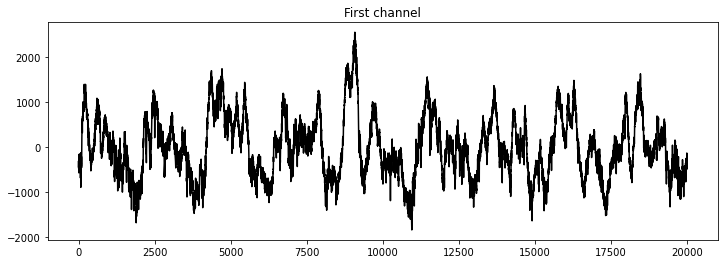

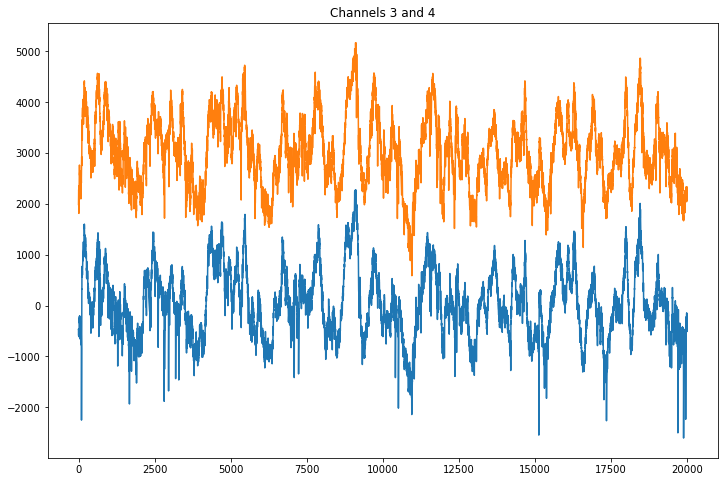

In [6]:
# plot the first channel
plt.figure(figsize=(12,4))
plt.plot(dat[0,:],c="black")
plt.title("First channel")
plt.show()

# plot 2 channels
plt.figure(figsize=(12,8))
plt.plot(dat[3,:])
plt.plot(dat[4,:]+3000) # I added 3000 to the values of channel 4 to be able to see it.
plt.title("Channels 3 and 4")
plt.show()

In [7]:
print("The mean of dat is :",dat.mean())
print("Mean per channel:")
print(dat.mean(axis=1))

The mean of dat is : 3.06385
Mean per channel:
[ -9.30035  18.965   -14.9138   28.8605   16.56955  29.91675 -33.8044
 -11.78245]


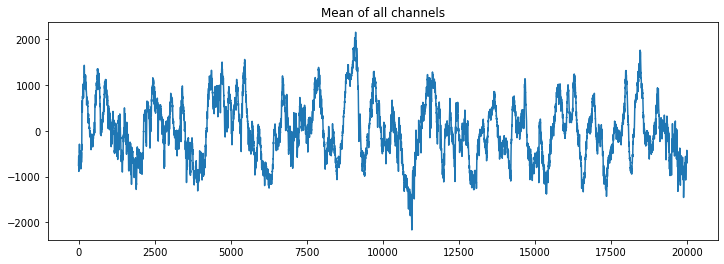

In [8]:
plt.figure(figsize=(12,4))
plt.plot(dat.mean(axis=0))
plt.title("Mean of all channels")
plt.show()

In [9]:
dat+100
print("Standard deviation per channel:")
print(dat.std(axis=1))
      
print("Channel with the largest standard deviation")
print(np.argmax(dat.std(axis=1))) # note the use of np.argmax()

Standard deviation per channel:
[676.37638925 676.71487369 682.68302745 669.85032936 688.10030647
 641.68837049 673.63273573 651.19369954]
Channel with the largest standard deviation
4


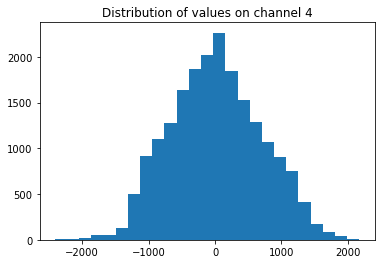

In [10]:
plt.hist(dat[4,:],bins=25)
plt.title("Distribution of values on channel 4")
plt.show()

# Filtering exercises

Luckily, the sosfiltfilt() function can take 2D arrays as input, so we can filter 8 channels with one line.

In [ ]:
y = sosfiltfilt(myFilter, dat) # the sosfilt() function can take a 2D array and will filter every row separately
y.shape # y now contains our 8 channels